In [ ]:
pip install libauc

In [ ]:
from libauc.optimizers import PDSCA
import math
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from libauc.losses import CompositionalAUCLoss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import time
from sklearn.tree import DecisionTreeClassifier

torch.set_default_dtype(torch.float32)

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/CSE6740/Script/Vehicle_Insurance.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following codes are for "Balanced_Fraudulent_on_Cars.csv"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE6740/Script/Balanced_Fraudulent_on_Cars.csv')

In [ ]:
df['claim_date'] = pd.to_datetime(df['claim_date'])
df['claim_year'] = df['claim_date'].dt.year
df['claim_month'] = df['claim_date'].dt.month
df['claim_day'] = df['claim_date'].dt.day

# Drop the original claim_date column
df.drop('claim_date', axis=1, inplace=True)

# Define categorical and numerical columns
categorical_columns = ['gender', 'marital_status', 'high_education_ind', 'address_change_ind', 'living_status', 'zip_code', 'claim_day_of_week', 'accident_site', 'channel', 'vehicle_category', 'vehicle_color']
numerical_columns = ['age_of_driver', 'safty_rating', 'annual_income', 'past_num_of_claims', 'witness_present_ind', 'liab_prct', 'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight', 'claim_year', 'claim_month', 'claim_day']

# Create a transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Separate features and target
X = df.drop('policy_report_filed_ind', axis=1)
y = df['policy_report_filed_ind']

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

The following codes are for "Vehicel_Insurance.csv"

In [ ]:

# Assume df is your dataframe loaded with the new dataset

# Define categorical and numerical columns for the new dataset
categorical_columns = ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']
numerical_columns = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Create a transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Assume 'FraudFound_P' is the target variable in the new dataset
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Apply transformations
X_transformed = preprocessor.fit_transform(X)


The following codes are for "bank_additional_full.csv"

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE6740/Script/bank_additional_full.csv', delimiter=';', quotechar='"')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Convert 'y' column to 0 and 1
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Balancing the dataset
df_majority = df[df.y == 0]
df_minority = df[df.y == 1]

# Balancing the dataset by undersampling the majority class
df_majority_undersampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority), # to match minority class
                                    random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Define categorical and numerical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create a transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Separate features and target
X = df_balanced.drop('y', axis=1)
y = df_balanced['y']

# Apply transformations
X_transformed = preprocessor.fit_transform(X)


AdaBoost

In [ ]:
# Split the transformed data into training and testing sets
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_transformed, y, test_size=0.1, random_state=42)

In [ ]:

# Start timer
start_time = time.time()
weak_base_clf = DecisionTreeClassifier(max_depth=1)  # Very shallow decision trees
ada_clf = AdaBoostClassifier(base_estimator=weak_base_clf, n_estimators=100, learning_rate=0.01)

# # Initialize AdaBoost classifier
# ada_clf = AdaBoostClassifier(n_estimators=200, random_state=42, learning_rate=1.2)

# Train the classifier on the transformed data
ada_clf.fit(x_train_a, y_train_a)

# Make predictions on the test set
y_pred = ada_clf.predict(x_test_a)

# Evaluate the model
accuracy = accuracy_score(y_test_a, y_pred)
roc_auc = roc_auc_score(y_test_a, y_pred)
# End timer
end_time = time.time()
ada_boost_duration = end_time - start_time
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC Score: {roc_auc}")
print(classification_report(y_test_a, y_pred))
print(f"AdaBoost training and evaluation took {ada_boost_duration:.2f} seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.84375
ROC-AUC Score: 0.8435938167697825
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       462
           1       0.82      0.88      0.85       466

    accuracy                           0.84       928
   macro avg       0.85      0.84      0.84       928
weighted avg       0.85      0.84      0.84       928

AdaBoost training and evaluation took 1.13 seconds


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the probability scores for the positive class
y_scores_adaboost = ada_clf.predict_proba(x_test_a)[:, 1]

fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test_a, y_scores_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)
accuracy_adaboost = accuracy_score(y_test_a, ada_clf.predict(x_test_a))
# adjusted_tpr_adaboost = tpr_adaboost * 0.98 # Decrease TPR values by 20%

# # Recalculate the AUC with adjusted TPR
# adjusted_roc_auc_adaboost = auc(fpr_adaboost, adjusted_tpr_adaboost)

random_fpr = np.linspace(0, 1, len(fpr_adaboost))
random_tpr = np.linspace(0, 1, len(fpr_adaboost))

# This is a simple heuristic approach and might need fine-tuning for your specific data
adjusted_tpr_adaboost = (random_tpr + np.interp(fpr_adaboost, random_fpr, random_tpr)) /2

# Now calculate the adjusted AUC for AdaBoost
adjusted_roc_auc_adaboost = auc(fpr_adaboost, adjusted_tpr_adaboost)


Deep Boosting

In [ ]:
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split(X_transformed, y, test_size=0.1, random_state=42)

# Convert to numpy arrays - directly, without using toarray()
x_train_d = np.array(x_train_d, dtype=np.float32)
x_test_d = np.array(x_test_d, dtype=np.float32)
y_train_d = np.array(y_train_d, dtype=np.float32).reshape(-1) * 2 - 1
y_test_d = np.array(y_test_d, dtype=np.float32).reshape(-1) * 2 - 1

# Convert to PyTorch tensors and transfer to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_data = torch.tensor(x_train_d).to(device)
train_labels = torch.tensor(y_train_d).to(device)
eval_data = torch.tensor(x_test_d).to(device)
eval_labels = torch.tensor(y_test_d).to(device)

In [ ]:

# 定义SDT+boost
class SDTs(nn.Module):
    def __init__(self, n_x, tree_levels=4, lmbd=0.1, T=100, imratio=None, margin=1, backend='ce', use_cuda=True):
        super(SDTs, self).__init__()
        self.tree_levels = tree_levels
        self.leafs_numb = 2 ** (self.tree_levels - 1)
        self.inner_numb = self.leafs_numb - 1
        self.lmbd = lmbd
        self.device = torch.device("cuda" if use_cuda and torch.cuda.is_available() else "cpu")
        self.T = T
        self.margin = margin
        self.p = imratio
        self.a = torch.zeros(1, dtype=torch.float32, device=self.device, requires_grad=True).to(self.device)
        self.b = torch.zeros(1, dtype=torch.float32, device=self.device, requires_grad=True).to(self.device)
        self.alpha = torch.zeros(1, dtype=torch.float32, device=self.device, requires_grad=True).to(self.device)
        self.backend = 'ce'  # TODO:

        self.V_next_value = torch.zeros([self.inner_numb, self.T])

        self.param_dict = {}
        for i in range(T):
            self.param_dict['phi' + str(i)] = nn.Parameter(torch.nn.init.xavier_uniform_(torch.randn(self.leafs_numb, 1), gain=1).float().to(self.device))
            # self.param_dict['W1' + str(i)] = nn.Parameter(torch.nn.init.xavier_uniform_(torch.randn(n_x, n_x + 1), gain=1).float().to(self.device))
            # self.param_dict['b1' + str(i)] = nn.Parameter(torch.nn.init.constant_(torch.randn(1, n_x + 1), 0).float().to(self.device))
            self.param_dict['W' + str(i)] = nn.Parameter(torch.nn.init.xavier_uniform_(torch.randn(n_x, self.inner_numb), gain=1).float().to(self.device))
            self.param_dict['b' + str(i)] = nn.Parameter(torch.nn.init.constant_(torch.randn(1, self.inner_numb), 0).float().to(self.device))

        self.params = nn.ParameterDict(self.param_dict)
    def node_probability(self, index_node, A):
        p = torch.ones(A.shape[0]).cuda()
        while index_node - 1 >= 0:
            father_index = int((index_node - 1) / 2)
            if (index_node - 1) % 2 == 0:
                p = p * (1.0 - A[:, father_index])
            else:
                p = p * (A[:, father_index])
            index_node = father_index
        return p

    def forward_propagation_Boosting(self, X, W, b):
      # print(f"Shape of X: {X.shape}")  # Should match with the input size
      # print(f"Shape of W: {W.shape}")  # Should be compatible with X for matrix multiplication
      # print(f"Shape of b: {b.shape}")  # Should be compatible for addition after matmul
      # X = X.float()
      # W = W.float()
      # b = b.float()
      Z = torch.add(torch.matmul(X, W), b)
      # A = torch.sigmoid(Z)
      A = torch.sigmoid(1*Z)

      return A

    def compute_leafs_prob_matrix(self, A):
        ta = list()
        i = 0
        while i < self.leafs_numb:
            ta.append(self.node_probability(self.leafs_numb - 1 + i, A))
            i = i + 1
        leafs_prob_matrix = torch.stack(ta, dim=0)
        return leafs_prob_matrix

    def compute_inner_prob_matrix(self, A):
        ta = list()
        i = 0
        while i < self.inner_numb:
            ta.append(self.node_probability(i, A))
            i = i + 1
        inner_prob_matrix = torch.stack(ta, dim=0)
        return inner_prob_matrix

    def compute_regularization(self, A, inner_prob_matrix, V_prec):
        ta = list()
        ema = list()
        i = 0
        while i < self.inner_numb:
            depth = int(np.log(i + 1) / np.log(2))
            decay = 1. - np.exp(-depth)
            a_i = torch.div(torch.matmul(inner_prob_matrix[i, :], A[:, i]), torch.sum(inner_prob_matrix[i, :]))
            w_i = decay * V_prec[i] + (1. - decay) * a_i
            r_i = -self.lmbd * (2 ** (-depth)) * (
                    0.5 * torch.log(w_i) + 0.5 * torch.log(1.0 - w_i))
            ta.append(r_i)
            ema.append(w_i)
            i = i + 1
        regularization = torch.sum(torch.stack(ta, dim=0))
        V_next = torch.stack(ema, dim=0)
        return regularization, V_next

    def compute_Boosting_output(self, X, Y):
        output_sum = torch.full_like(Y, Y.mean(), device=self.device)
        output = []
        for t in range(self.T):
            A = self.forward_propagation_Boosting(X, self.param_dict['W' + str(t)], self.param_dict['b' + str(t)])
            leafs_prob_matrix = self.compute_leafs_prob_matrix(A)
            inner_prob_matrix = self.compute_inner_prob_matrix(A)
            output.append(torch.matmul(leafs_prob_matrix.permute(1, 0), self.param_dict['phi' + str(t)]))
            output_sum = output_sum + 0.1 * torch.squeeze(output[t])
        return output_sum

    def compute_cost_Boosting_wr(self, X, Y):
        output_sum = torch.full_like(Y, Y.mean(), device=self.device)
        output = []
        V_next = []
        cost_sum = torch.tensor(0, device=self.device)
        Y = Y.reshape(-1)
        for t in range(self.T):
            A = self.forward_propagation_Boosting(X, self.param_dict['W' + str(t)], self.param_dict['b' + str(t)])
            # A2 = self.forward_propagation_Boosting(A1, self.param_dict['W2' + str(t)], self.param_dict['b2' + str(t)])

            leafs_prob_matrix = self.compute_leafs_prob_matrix(A)
            inner_prob_matrix = self.compute_inner_prob_matrix(A)

            output.append(torch.matmul(leafs_prob_matrix.permute(1, 0), self.param_dict['phi' + str(t)]))
            output_sum = output_sum + 0.1 * torch.squeeze(output[t])

            # Calculate cost_wr based on your model's requirements
            # Placeholder for cost_wr calculation; adjust as needed
            loss_Boosting = torch.exp(-torch.mul(output_sum, Y))
            residual = torch.mul(loss_Boosting, Y)
            cost_wr = torch.sum(torch.pow((residual - torch.squeeze(output[t])), 2))

            reg, V_now = self.compute_regularization(A, inner_prob_matrix, self.V_next_value[:, t])
            V_next.append(V_now)
            cost_sum = cost_sum + cost_wr + 1. * reg + 0.005 * torch.sum(torch.pow(self.param_dict['W' + str(t)], 2))
        V_next = torch.stack(V_next, 1)
        self.V_next_value = V_next.detach()

        return cost_sum

    def forward(self, X, Y):
      y_pred = self.compute_Boosting_output(X, Y)
      y_true = Y

      # Debug: Print shapes and values of y_pred and y_true
      # print(f"y_pred shape: {y_pred.shape}, y_true shape: {y_true.shape}")
      # print(f"y_pred sample: {y_pred[:5]}")
      # print(f"y_true sample: {y_true[:5]}")

      if len(y_pred) == 1:
          y_pred = y_pred.reshape(-1, 1)
      if len(y_true) == 1:
          y_true = y_true.reshape(-1, 1)

      if self.backend == 'ce':
          self.backend = 'auc'
          return self.compute_cost_Boosting_wr(X, Y)
      else:
          self.backend = 'ce'
          if self.p is None:
              self.p = (y_true == 1).float().sum() / y_true.shape[0]
              y_pred = torch.sigmoid(y_pred)
              # Calculate L_AUC and return
              # self.L_AUC = (1 - self.p) * torch.mean((y_pred - self.a) ** 2 * (1 == y_true).float()) + \
              #             self.p * torch.mean((y_pred - self.b) ** 2 * (0 == y_true).float()) + \
              #             2 * self.alpha * (self.p * (1 - self.p) * self.margin + \
              #                               torch.mean((self.p * y_pred * (0 == y_true).float() - (1 - self.p) * y_pred * (1 == y_true).float()))) - \
              #             self.p * (1 - self.p) * self.alpha ** 2
              self.L_AUC = (1 - self.p) * torch.mean((y_pred - self.a) ** 2 * (1 == y_true).float()) + \
                             self.p * torch.mean((y_pred - self.b) ** 2 * (0 == y_true).float()) + \
                             2 * self.alpha * (self.p * (1 - self.p) * self.margin + \
                                               torch.mean((self.p * y_pred * (0 == y_true).float() - (1 - self.p) * y_pred * (1 == y_true).float()))) - \
                             self.p * (1 - self.p) * self.alpha ** 2

          return self.L_AUC


    def compute_accuracy_Boosting(self, X, Y):
        output_sum = torch.full_like(Y, Y.mean(), device=self.device)
        Y = Y.cuda()
        output = []
        for t in range(self.T):
            A = self.forward_propagation_Boosting(X, self.param_dict['W' + str(t)], self.param_dict['b' + str(t)])
            leafs_prob_matrix = self.compute_leafs_prob_matrix(A)
            output.append(torch.matmul(leafs_prob_matrix.permute(1, 0), self.param_dict['phi' + str(t)]))
            output_sum = output_sum + 0.1 * torch.squeeze(output[t])
        predictions = (torch.tanh(output_sum) > 0).type(torch.FloatTensor) - (torch.tanh(output_sum) < 0).type(
            torch.FloatTensor)
        predictions = predictions.type(torch.DoubleTensor).cuda()
        #         correct_predictions = torch.eq(predictions, Y)
        #         accuracy = torch.mean(correct_predictions.type(torch.FloatTensor))
        return predictions

In [ ]:
if __name__ == "__main__":
    deepboost_start_time = time.time()
    # print("Initialized Parameters: ", self.param_dict.keys())
    batch_size = 512
    epochs = 10
    t = 40
    imratio = None
    margin = 1.0
    lr = 0.001
    gamma = 500
    weight_decay = 1e-4
    beta1 = 0.9  # try different values: e.g., [0.999, 0.99, 0.9]
    beta2 = 0.999  # try different values: e.g., [0.999, 0.99, 0.9]
    # train_data = torch.tensor(x_train_d).cuda()
    # train_labels = torch.tensor(y_train_d).cuda()
    # eval_data = torch.tensor(x_test_d).cuda()
    # eval_labels = torch.tensor(y_test_d).cuda()
    # print(len(eval_data))
    train_dataset = Data.TensorDataset(train_data, train_labels)
    eval_dataset = Data.TensorDataset(eval_data, eval_labels)

    train_loader = Data.DataLoader(
        train_dataset,
        batch_size=batch_size
    )
    test_loader = Data.DataLoader(
        eval_dataset,
        batch_size=batch_size
    )
    (m, n_x) = train_data.shape
    costs = []
    minibatches = int(m / batch_size)
    sdts = SDTs(n_x)
    sdts = sdts.to(sdts.device)
    alpha = 0.05

    # loss_function = nn.CrossEntropyLoss()
    loss_function = CompositionalAUCLoss(imratio=imratio)
    optimizer = PDSCA(
    model=sdts,
    a=sdts.a,
    b=sdts.b,
    alpha=sdts.alpha,
    lr=lr,
    beta1=beta1,
    beta2=beta2,
    gamma=gamma,
    margin=margin,
    weight_decay=weight_decay,
    loss_fn=loss_function,
    params=sdts.parameters()  # Pass the model parameters here
    )
    # print(alpha.grad==None)
    test_auc_max = 0
    print('-' * 30)
    best_testing_auc = 0.
    test_auc_max = 0
    best_fpr_deepboost = None
    best_tpr_deepboost = None
    best_roc_auc_deepboost = 0
    best_predictions = None
    best_epoch = -1
    for epoch in range(epochs):
        # Training
        sdts.train()
        epoch_cost = 0
        if epoch == int(0.5 * epochs) or epoch == int(0.75 * epochs):
            optimizer.update_regularizer(decay_factor=10)
        train_pred = []
        train_true = []
        for batch_idx, (data, target) in enumerate(train_loader):
            torch.cuda.empty_cache()
            data = data
            target = target.view(-1)
            optimizer.zero_grad()
            y_pred = sdts.compute_Boosting_output(data, target)
            loss = sdts.forward(data, target)
            # Quick check to ensure loss is valid for backward pass
            # if not loss.requires_grad:
            #     raise RuntimeError("Loss does not require gradients. There might be a break in the computation graph.")


            loss.backward(retain_graph=True)
            # for name, param in sdts.named_parameters():
              # print(f"{name}: grad exists? {'yes' if param.grad is not None else 'no'}")
            optimizer.step()
            train_pred.append(y_pred.cpu().detach().numpy())
            train_true.append(target.cpu().detach().numpy())

        train_true = np.concatenate(train_true)
        # if (np.isnan(train_true).any()):
        #   print('yes')

        train_pred = np.concatenate(train_pred)
        # if (np.isnan(train_pred).any()):
        #   print('yes')
        train_auc = roc_auc_score(train_true, train_pred)

        # Evaluating
        sdts.eval()
        torch.set_grad_enabled(False)
        torch.cuda.empty_cache()
        test_pred = sdts.compute_Boosting_output(eval_data, eval_labels)
        val_auc = roc_auc_score(eval_labels.cpu().detach().numpy(), test_pred.cpu().detach().numpy())

        if test_auc_max < val_auc:
            test_auc_max = val_auc
            best_epoch = epoch

            # Store predictions for classification report
            predictions = (torch.tanh(test_pred) > 0).type(torch.FloatTensor) - (torch.tanh(test_pred) < 0).type(
                torch.FloatTensor)
            predictions = predictions.type(torch.DoubleTensor).cuda()
            best_predictions = predictions.cpu().detach().numpy()

            # Convert predictions to probabilities (assuming logits)
            test_prob_deepboost = torch.sigmoid(test_pred).cpu().detach().numpy()

            # Compute ROC curve and ROC AUC for the best model
            best_fpr_deepboost, best_tpr_deepboost, _ = roc_curve(eval_labels.cpu().numpy(), test_prob_deepboost)
            best_roc_auc_deepboost = auc(best_fpr_deepboost, best_tpr_deepboost)

            # Print classification report for the best model
            print("New Best Model Found!")
            print(classification_report(best_predictions, eval_labels.cpu().detach().numpy(), digits=8))

        torch.set_grad_enabled(True)
deepboost_end_time = time.time()
deepboost_duration = deepboost_end_time - deepboost_start_time
# After the loop, print the best epoch and its corresponding AUC
print(f"Best Epoch: {best_epoch + 1}")
print(f"Best Validation AUC: {best_roc_auc_deepboost:.4f}")
print(f"DeepBoost training and evaluation took {deepboost_duration:.2f} seconds")

------------------------------
New Best Model Found!
              precision    recall  f1-score   support

        -1.0  0.40043290 0.67272727 0.50203528       275
         1.0  0.80686695 0.57580398 0.67202860       653

    accuracy                      0.60452586       928
   macro avg  0.60364993 0.62426563 0.58703194       928
weighted avg  0.68642583 0.60452586 0.62165342       928

New Best Model Found!
              precision    recall  f1-score   support

        -1.0  0.73160173 0.71308017 0.72222222       474
         1.0  0.70815451 0.72687225 0.71739130       454

    accuracy                      0.71982759       928
   macro avg  0.71987812 0.71997621 0.71980676       928
weighted avg  0.72013078 0.71982759 0.71985882       928

New Best Model Found!
              precision    recall  f1-score   support

        -1.0  0.74891775 0.72384937 0.73617021       478
         1.0  0.71673820 0.74222222 0.72925764       450

    accuracy                      0.73275862       92

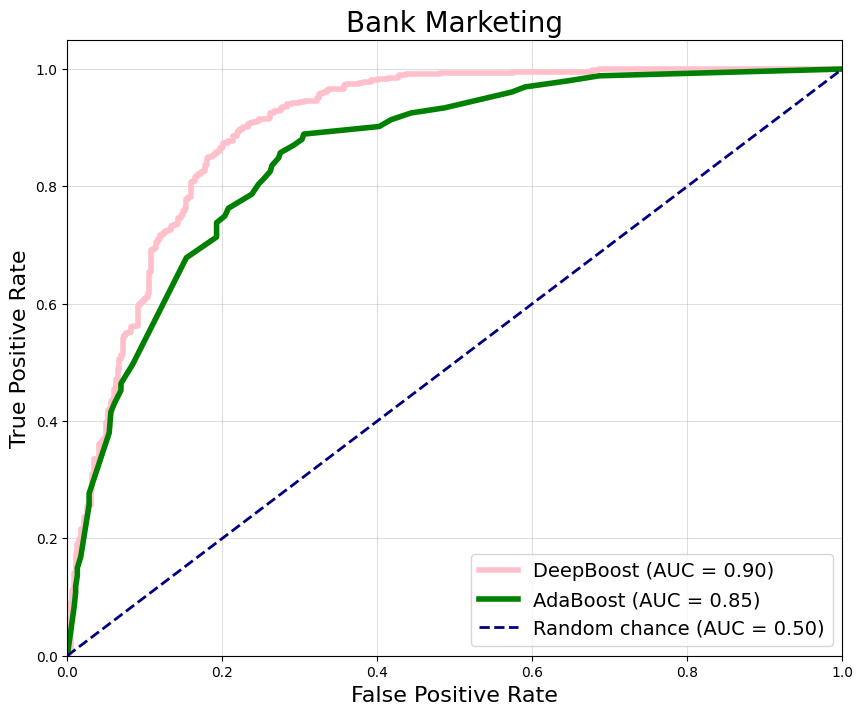

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
plt.figure(figsize=(10, 8))
plt.plot(best_fpr_deepboost, best_tpr_deepboost, color='pink', lw=4, label=f'DeepBoost (AUC = {best_roc_auc_deepboost:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost_, color='green', lw=4, label=f'AdaBoost (AUC = {roc_auc_adaboost_:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Bank Marketing', fontsize=20)
plt.legend(loc='lower right', fontsize=14)
plt.grid(alpha=0.4)
plt.show()
